In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

### Read file

In [69]:
file_path = './Banks.csv'

df = pd.read_csv(file_path)

### EDA

In [70]:
df.head()

,author,date,location,bank,star,text,like
0,Kyle,31.08.2023,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,NaN
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,NaN
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19271 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    19269 non-null  object 
 1   date      19271 non-null  object 
 2   location  19271 non-null  object 
 3   bank      19271 non-null  object 
 4   star      19271 non-null  int64  
 5   text      19181 non-null  object 
 6   like      17769 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


In [71]:
null_values = df.isnull().sum()
print(null_values)

author         2
date           0
location       0
bank           0
star           0
text          90
like        1502
dtype: int64


In [72]:
df.dropna(axis=0, how='any', inplace=True) #we'll work just with rows with all the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
star,17683.0,1.289487,0.949438,1.0,1.0,1.0,1.0,5.0
like,17683.0,11.114291,8.098303,2.0,6.0,9.0,14.0,248.0


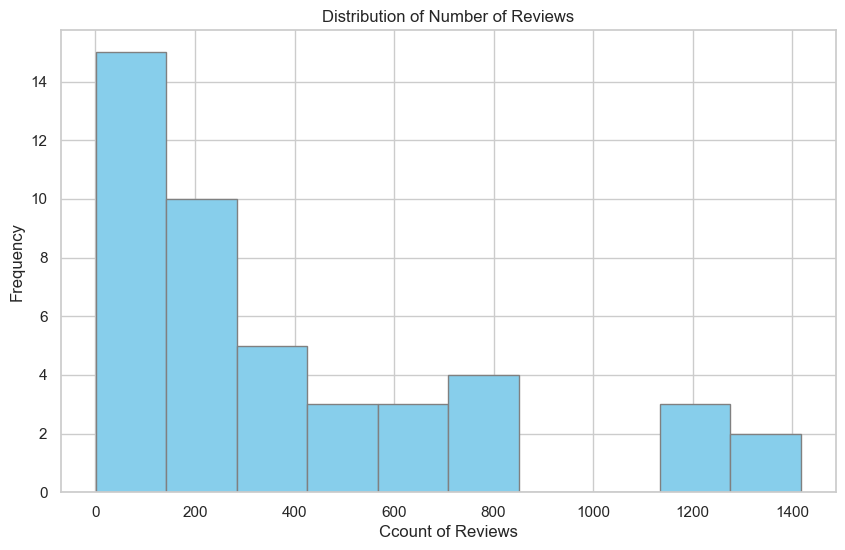

In [73]:
# count of reviews by bank
conteo_por_banco = df.groupby('bank')['text'].count()

# make histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(conteo_por_banco, bins=10, color='skyblue', edgecolor='gray')

# add labels and title
plt.xlabel('Ccount of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')

# show the plot
plt.show()

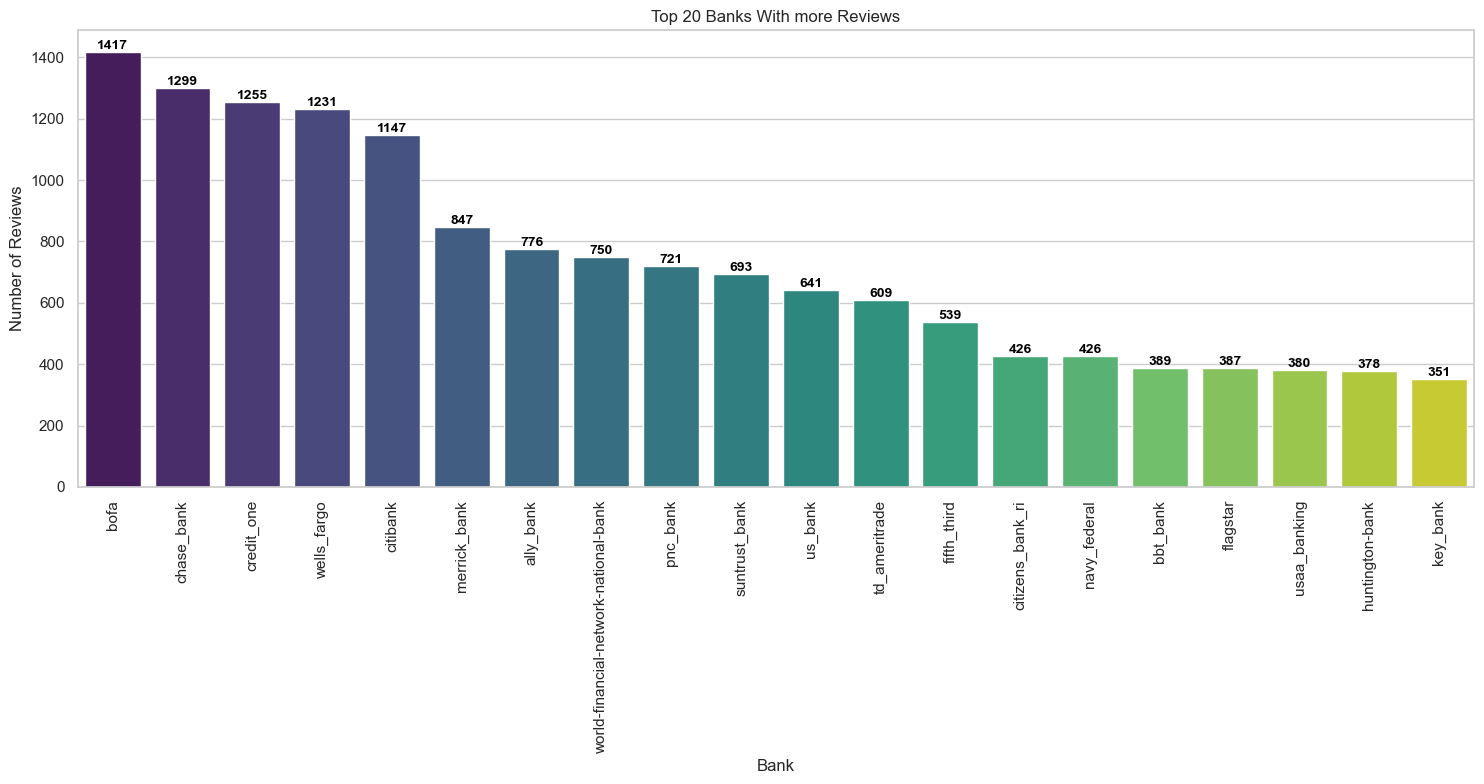

In [74]:
# get the count of reviews by bank and select the first 20
top_20_bancos = df.groupby('bank')['text'].count().sort_values(ascending=False).head(20)

#make the plot
plt.figure(figsize=(15, 8))  # Ajusta el tamaño de la figura
sns.barplot(x=top_20_bancos.index, y=top_20_bancos.values, palette='viridis')

# add labels and title
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.title('Top 20 Banks With more Reviews')

# rotate x-axis labels
plt.xticks(rotation=90)

# add labels to bars
for i, valor in enumerate(top_20_bancos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


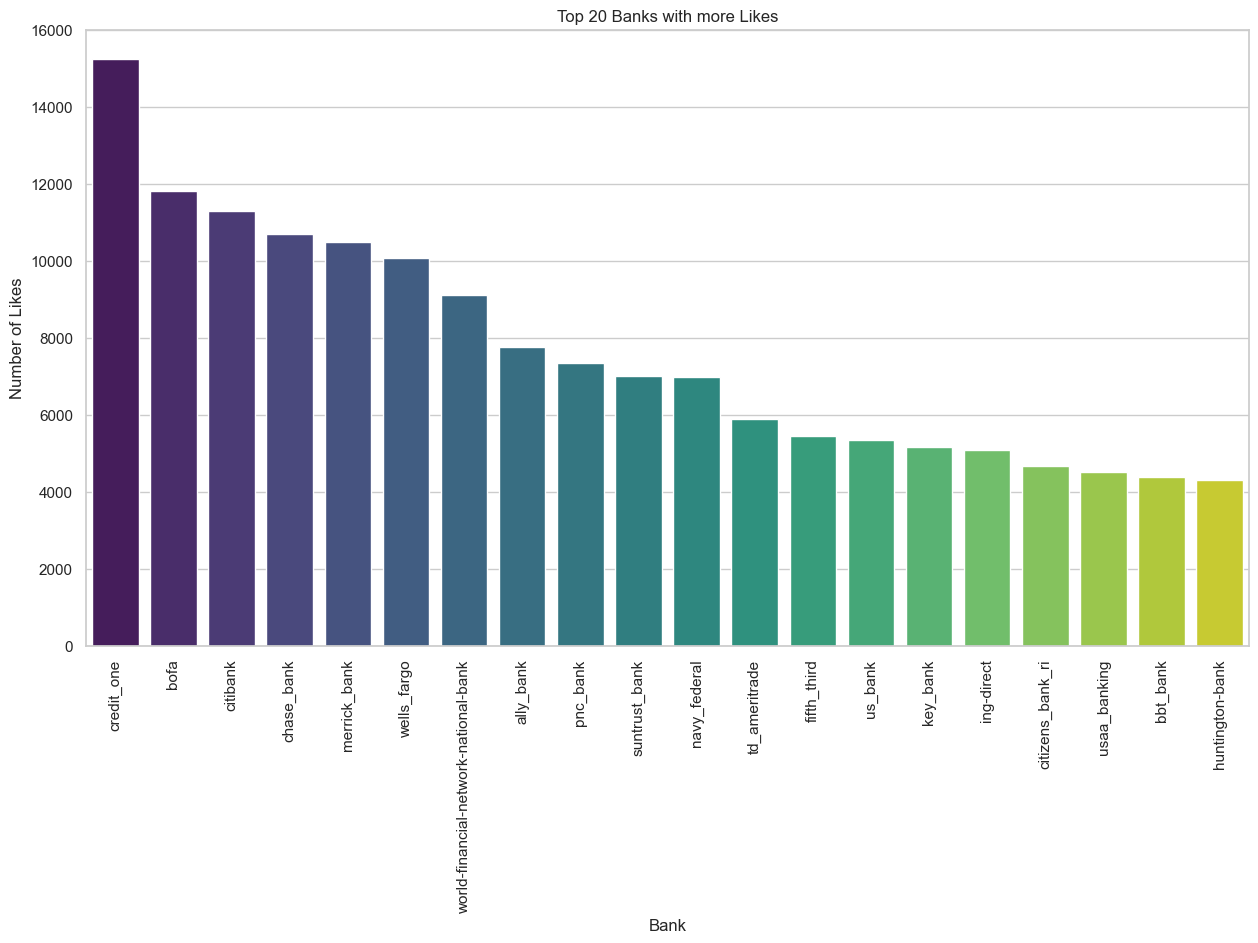

In [76]:
# get the number of likes for each bank
top_20_bank_likes = df.groupby('bank')['like'].sum().sort_values(ascending=False).head(20)

# make the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20_bank_likes.index, y=top_20_bank_likes.values, palette='viridis')

plt.xlabel('Bank')
plt.ylabel('Number of Likes')
plt.title('Top 20 Banks with more Likes')

plt.xticks(rotation=90)

plt.show()

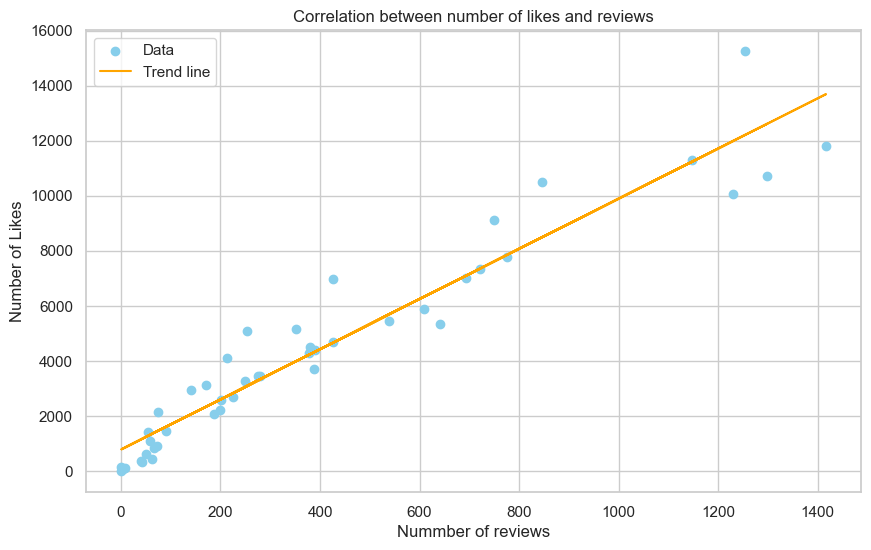

In [78]:
likes_by_bank = df.groupby('bank')['like'].sum()
reviews_by_bank = df.groupby('bank')['text'].count()

plt.figure(figsize=(10, 6))
plt.scatter(reviews_by_bank, likes_by_bank, color='skyblue', label='Data')

z = np.polyfit(reviews_by_bank, likes_by_bank, 1)
p = np.poly1d(z)
plt.plot(reviews_by_bank,p(reviews_by_bank), color='orange', label='Trend line')

# add labels and title
plt.xlabel('Nummber of reviews')
plt.ylabel('Number of Likes')
plt.title('Correlation between number of likes and reviews')

# add legend
plt.legend()

plt.show()

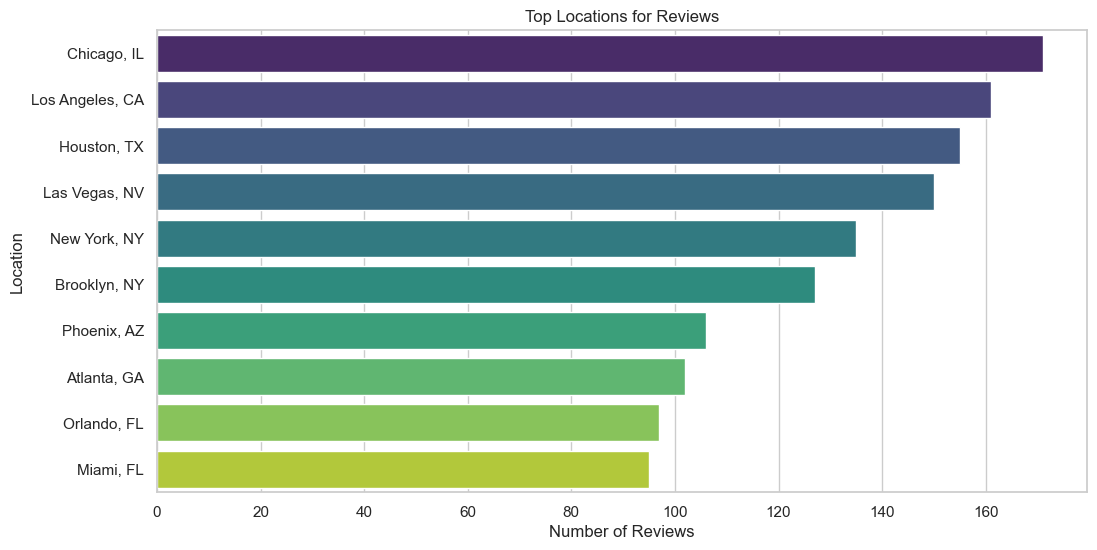

In [58]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
top_locations = df["location"].value_counts().head(10)
sns.barplot(x=top_locations, y=top_locations.index, palette="viridis")
plt.title("Top Locations for Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Location")

plt.show()

### NLP - sentiment analysis

In [79]:
# def function
def sentinment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Aplicar el análisis de sentimientos a la columna 'text'
df['sentiment'] = df['text'].apply(sentinment_analysis)

In [80]:
df.head()

,author,date,location,bank,star,text,like,sentiment
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0,negative
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0,positive
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0,positive
5,Michelle,18.11.2022,"Frankston, TX",merrick_bank,4,Overall I enjoy the card and use it over most ...,4.0,positive
6,Meredith,30.09.2022,"Pinson, AL",merrick_bank,5,What started out as a not so good experience t...,4.0,positive


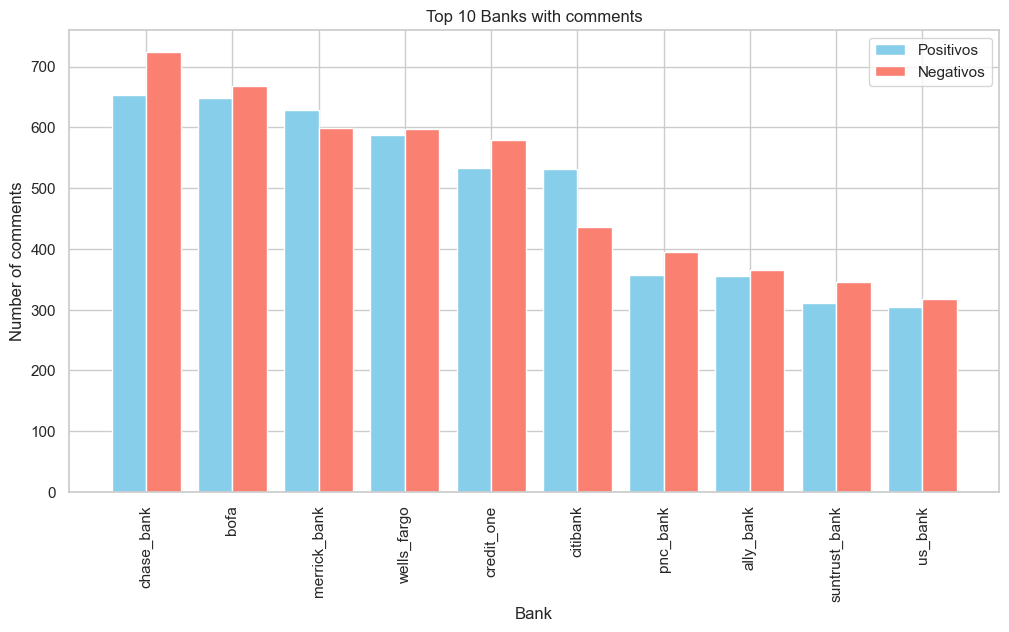

In [82]:
# filter by positive comments and negative comments
count_of_positives = df[df['sentiment'] == 'positive']
count_of_negatives  = df[df['sentiment'] == 'negative']

# count of positive comments and negative comments by bank
positive_by_bank = count_of_positives.groupby('bank')['sentiment'].count().sort_values(ascending=False)
negative_by_bank = count_of_negatives.groupby('bank')['sentiment'].count().sort_values(ascending=False)

# take top 10 by category
top_10_positives = positive_by_bank.head(10)
top_10_negatives = negative_by_bank.head(10)

x = np.arange(len(top_10_positives))

# define width of bar
ancho_barra = 0.4

# make a bar plot of top 10 banks with 2 bars
plt.figure(figsize=(12, 6))

# positive comments bar - blue
plt.bar(x, top_10_positives.values, width=ancho_barra, color='skyblue', label='Positivos', align='center')

# negative comments bar - red
plt.bar(x + ancho_barra, top_10_negatives.values, width=ancho_barra, color='salmon', label='Negativos', align='center')

# x axis set
plt.xlabel('Bank')
plt.ylabel('Number of comments')
plt.title('Top 10 Banks with comments')
plt.xticks(x + ancho_barra/2, top_10_positives.index, rotation=90)

plt.legend()

plt.show()